In [2]:
from utils import *

In [3]:
def create_model():
    num_classes = 4

    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(63, 63, 119)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes))
    model.summary()
    return model

In [45]:
def train_model(model, X_train, Y_train, X_val, Y_val):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(X_train, Y_train, epochs=30,
                        validation_data=(X_val, Y_val))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    

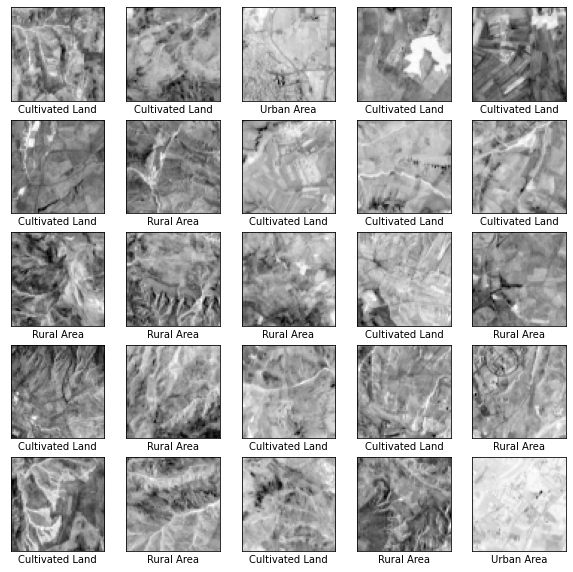

In [39]:
X, Y, _, _ = get_hsi()
show_img(X, Y)

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)
X_train.shape, Y_train.shape

((172, 63, 63, 119), (172, 1))

In [41]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)
X_test.shape, Y_test.shape

((22, 63, 63, 119), (22, 1))

In [42]:
X_val.shape, Y_val.shape

((22, 63, 63, 119), (22, 1))

In [43]:
model = create_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 61, 61, 32)        34304     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

Epoch 1/30
6/6 [==============================] - 3s 442ms/step - loss: 1.2615 - accuracy: 0.4826 - val_loss: 1.0724 - val_accuracy: 0.7273
Epoch 2/30
6/6 [==============================] - 3s 497ms/step - loss: 1.1091 - accuracy: 0.5698 - val_loss: 1.0152 - val_accuracy: 0.7273
Epoch 3/30
6/6 [==============================] - 4s 591ms/step - loss: 1.0876 - accuracy: 0.5698 - val_loss: 0.8706 - val_accuracy: 0.7273
Epoch 4/30
6/6 [==============================] - 3s 537ms/step - loss: 1.0688 - accuracy: 0.5698 - val_loss: 0.9064 - val_accuracy: 0.7273
Epoch 5/30
6/6 [==============================] - 3s 530ms/step - loss: 1.0454 - accuracy: 0.5698 - val_loss: 0.9274 - val_accuracy: 0.7273
Epoch 6/30
6/6 [==============================] - 3s 515ms/step - loss: 1.0203 - accuracy: 0.5698 - val_loss: 0.9860 - val_accuracy: 0.7273
Epoch 7/30
6/6 [==============================] - 3s 469ms/step - loss: 1.0674 - accuracy: 0.5756 - val_loss: 0.8452 - val_accuracy: 0.7273
Epoch 8/30
6/6 [====

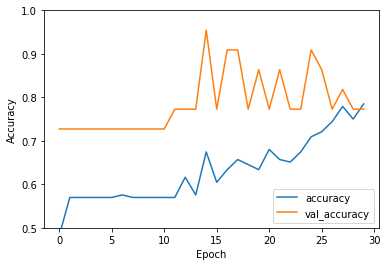

In [46]:
train_model(model, X_train, Y_train, X_val, Y_val)

In [47]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

1/1 - 0s - loss: 0.5661 - accuracy: 0.7273


In [48]:
model.save('cnn2d_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cnn2d_model/assets
